<a href="https://colab.research.google.com/github/eildes06/02_DS_DATA_SCIENCE/blob/main/timeseries_arimasarma_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gerekli kutuphaneler yuklendi.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

import itertools
import statsmodels.api as sm
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dtf = pd.read_excel('/content/drive/MyDrive/Data/Veri-Seti.xlsx',
                 index_col='Date',
                 parse_dates=True
                )

In [4]:


dtf.head()# ilk 5 gorunumu

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2010-01-01,20095.000,37.000,13.182,2.107,341244.126
2010-02-01,31172.000,37.000,13.273,2.074,351940.949
2010-03-01,51769.000,37.000,12.727,2.086,361307.320
2010-04-01,54946.000,37.000,12.012,2.009,373575.340
2010-05-01,59377.000,37.000,11.740,1.949,387708.051


In [5]:
dtf.tail()# son 5 gorunumu (None degerler var )

,Otomotiv Satis,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,,
2023-02-01,NaN,NaN,NaN,NaN,NaN
2023-03-01,NaN,NaN,NaN,NaN,NaN
2023-04-01,NaN,NaN,NaN,NaN,NaN
2023-05-01,NaN,NaN,NaN,NaN,NaN
2023-06-01,NaN,NaN,NaN,NaN,NaN


In [6]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 162 entries, 2010-01-01 to 2023-06-01
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Otomotiv Satis  149 non-null    float64
 1   OTV Orani       149 non-null    float64
 2   Faiz            149 non-null    float64
 3   EUR/TL          149 non-null    float64
 4   Kredi Stok      149 non-null    float64
dtypes: float64(5)
memory usage: 7.6 KB


In [7]:
dtf.dropna(inplace=True)# none degerler dusuruldu

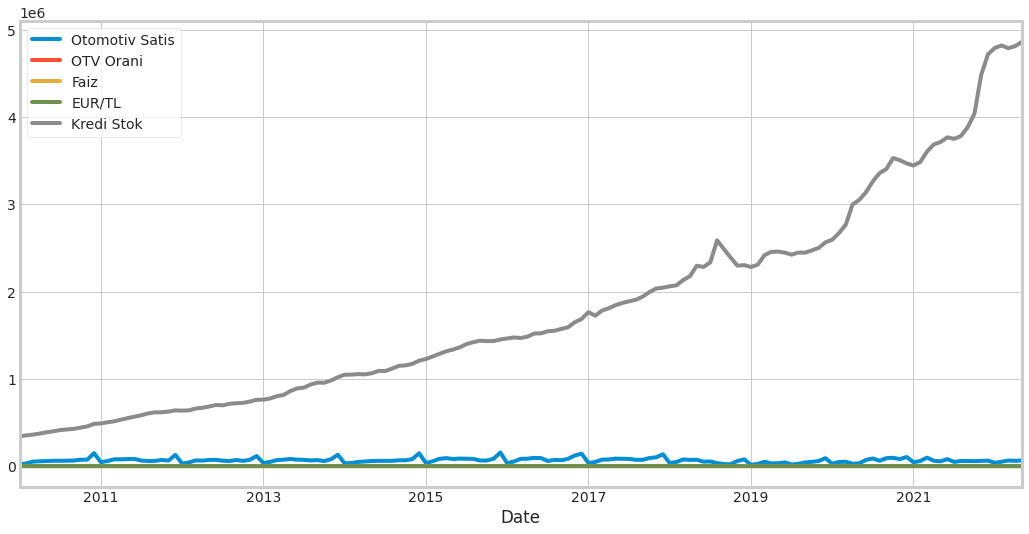

In [8]:
dtf.plot(figsize=(16,8));

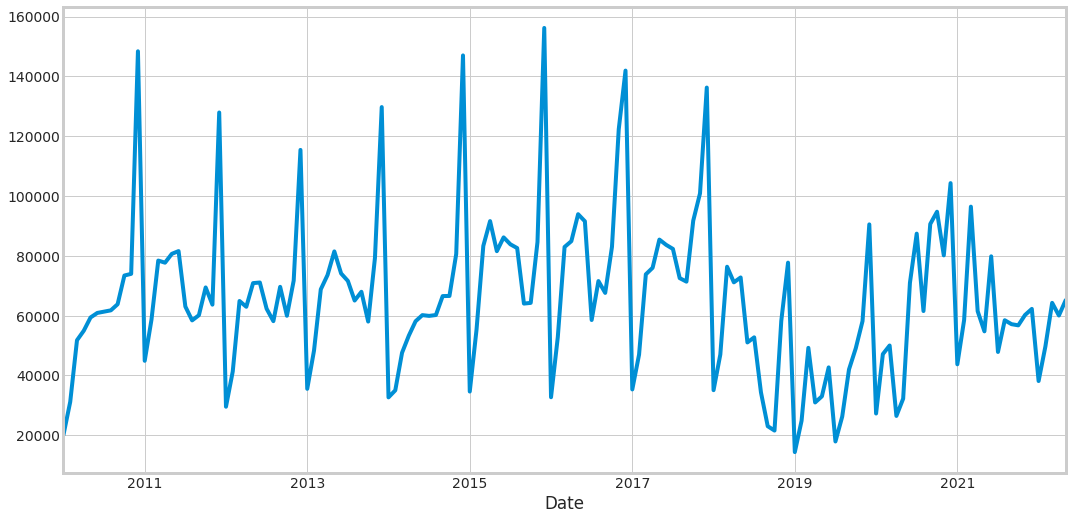

In [9]:
dtf["Otomotiv Satis"].plot(figsize=(16,8));

# Train Test

In [10]:
test_size = 12

In [11]:
test_ind = len(dtf)- test_size

In [12]:
train = dtf.iloc[:test_ind]
test = dtf.iloc[test_ind:]

In [13]:
X_train= train.drop("Otomotiv Satis",axis=1)
X_train

,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,
2010-01-01,37.000,13.182,2.107,341244.126
2010-02-01,37.000,13.273,2.074,351940.949
2010-03-01,37.000,12.727,2.086,361307.320
2010-04-01,37.000,12.012,2.009,373575.340
2010-05-01,37.000,11.740,1.949,387708.051
...,...,...,...,...
2021-01-01,50.000,19.040,9.024,3445966.108
2021-02-01,50.000,19.227,8.572,3485653.885
2021-03-01,50.000,19.358,9.108,3605919.171


In [14]:
y_train= train["Otomotiv Satis"]
y_train

Date
2010-01-01   20095.000
2010-02-01   31172.000
2010-03-01   51769.000
2010-04-01   54946.000
2010-05-01   59377.000
                ...   
2021-01-01   43728.000
2021-02-01   58504.000
2021-03-01   96428.000
2021-04-01   61488.000
2021-05-01   54734.000
Name: Otomotiv Satis, Length: 137, dtype: float64

In [15]:
X_test= test.drop("Otomotiv Satis",axis=1)
X_test

,OTV Orani,Faiz,EUR/TL,Kredi Stok
Date,,,,
2021-06-01,50.000,22.032,10.390,3768865.877
2021-07-01,50.000,22.254,10.211,3752176.711
2021-08-01,50.000,21.795,9.996,3783863.534
2021-09-01,50.000,21.325,10.047,3884280.824
2021-10-01,50.000,20.730,10.620,4039441.513
2021-11-01,50.000,21.457,12.033,4484955.758
2021-12-01,50.000,24.824,15.317,4721297.139
2022-01-01,60.000,28.250,15.342,4794119.759
2022-02-01,60.000,26.852,15.470,4822579.161


In [16]:
y_test= test["Otomotiv Satis"]
y_test

Date
2021-06-01   79819.000
2021-07-01   47849.000
2021-08-01   58454.000
2021-09-01   57141.000
2021-10-01   56746.000
2021-11-01   60216.000
2021-12-01   62243.000
2022-01-01   38131.000
2022-02-01   49652.000
2022-03-01   64267.000
2022-04-01   60035.000
2022-05-01   65167.000
Name: Otomotiv Satis, dtype: float64

In [17]:
! pip install statsmodels==0.12.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
fig = px.line(dtf, x=dtf.index, y='Otomotiv Satis', title='Otomotiv Satis Sayisi')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [19]:
# AR example
from statsmodels.tsa.ar_model import AutoReg
# fit model

model = AutoReg(train["Otomotiv Satis"], lags=12)
model_fit = model.fit()
# make prediction
pred = model_fit.predict(len(train),len(test)+len(train)-1,dynamic=False)
print(pred)

2021-06-01   64926.624
2021-07-01   70975.925
2021-08-01   50960.535
2021-09-01   71937.282
2021-10-01   78440.705
2021-11-01   72825.446
2021-12-01   94919.294
2022-01-01   54300.803
2022-02-01   61982.045
2022-03-01   95854.684
2022-04-01   72900.546
2022-05-01   63842.637
Freq: MS, dtype: float64


In [20]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [33]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(dtf["Otomotiv Satis"],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3728.8662995972873
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3337.468320226244
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:3108.95663945858
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2824.8802700208853
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:3128.411030468027
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:3103.8130047532995
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2850.8792872899467
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2825.6577490393115
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3626.50497359397
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3291.732191687105
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:3033.8473617755103
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2753.826408076939
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:3324.540171939641
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:3277.053458860539
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2805.229858277102
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2755.769616049999
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:3471.504370841685
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:3109.246219371296
ARIMA(

In [34]:
mod = sm.tsa.statespace.SARIMAX(dtf["Otomotiv Satis"],
                                order=(0, 1, 0),
                                seasonal_order=(0, 1, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.773e+09   1.73e+08     10.238      0.000    1.43e+09    2.11e+09


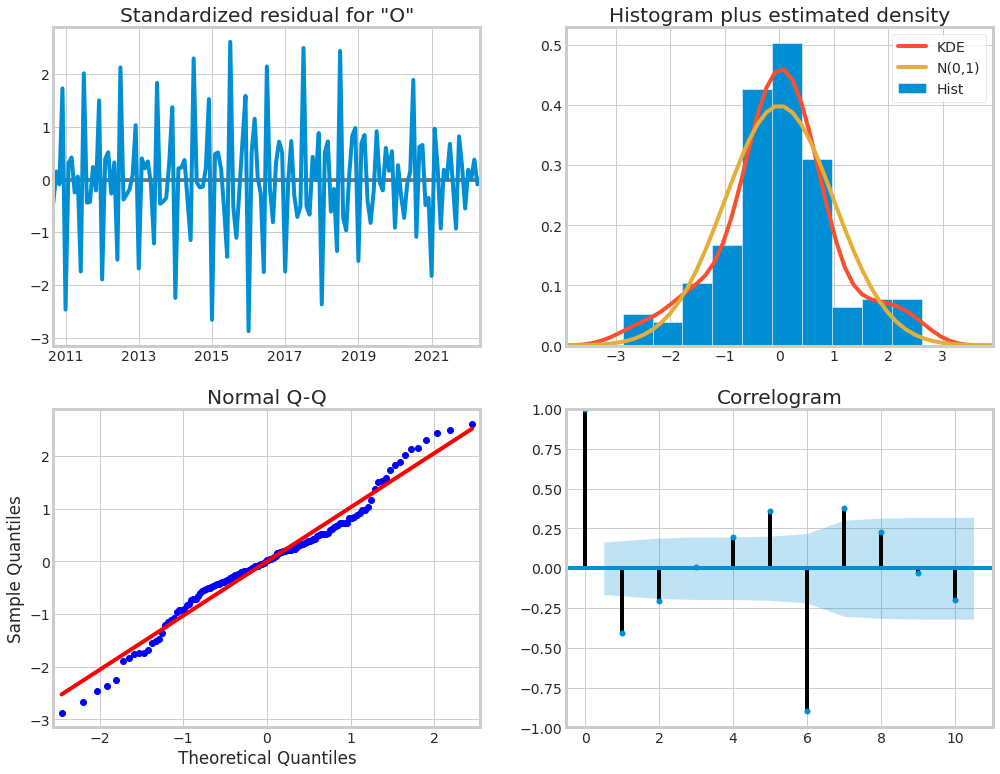

In [35]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [41]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False)
pred_ci = pred.conf_int()

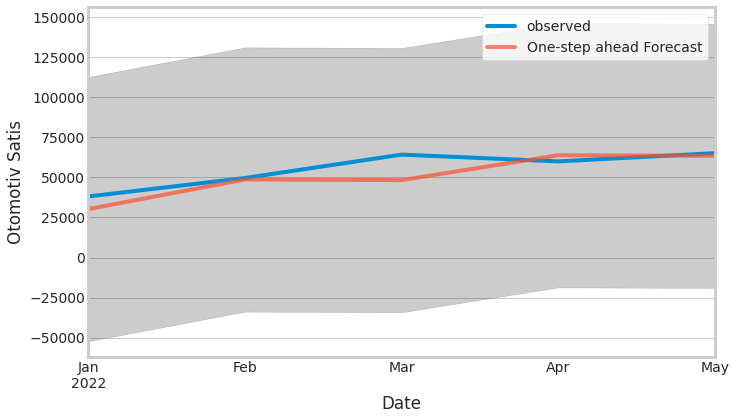

In [45]:
ax = dtf["Otomotiv Satis"]['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Otomotiv Satis')
plt.legend()

plt.show()

In [48]:
y_forecasted = pred.predicted_mean
y_truth = dtf["Otomotiv Satis"]['2021-06-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 66754643.4


In [49]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2022-06-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

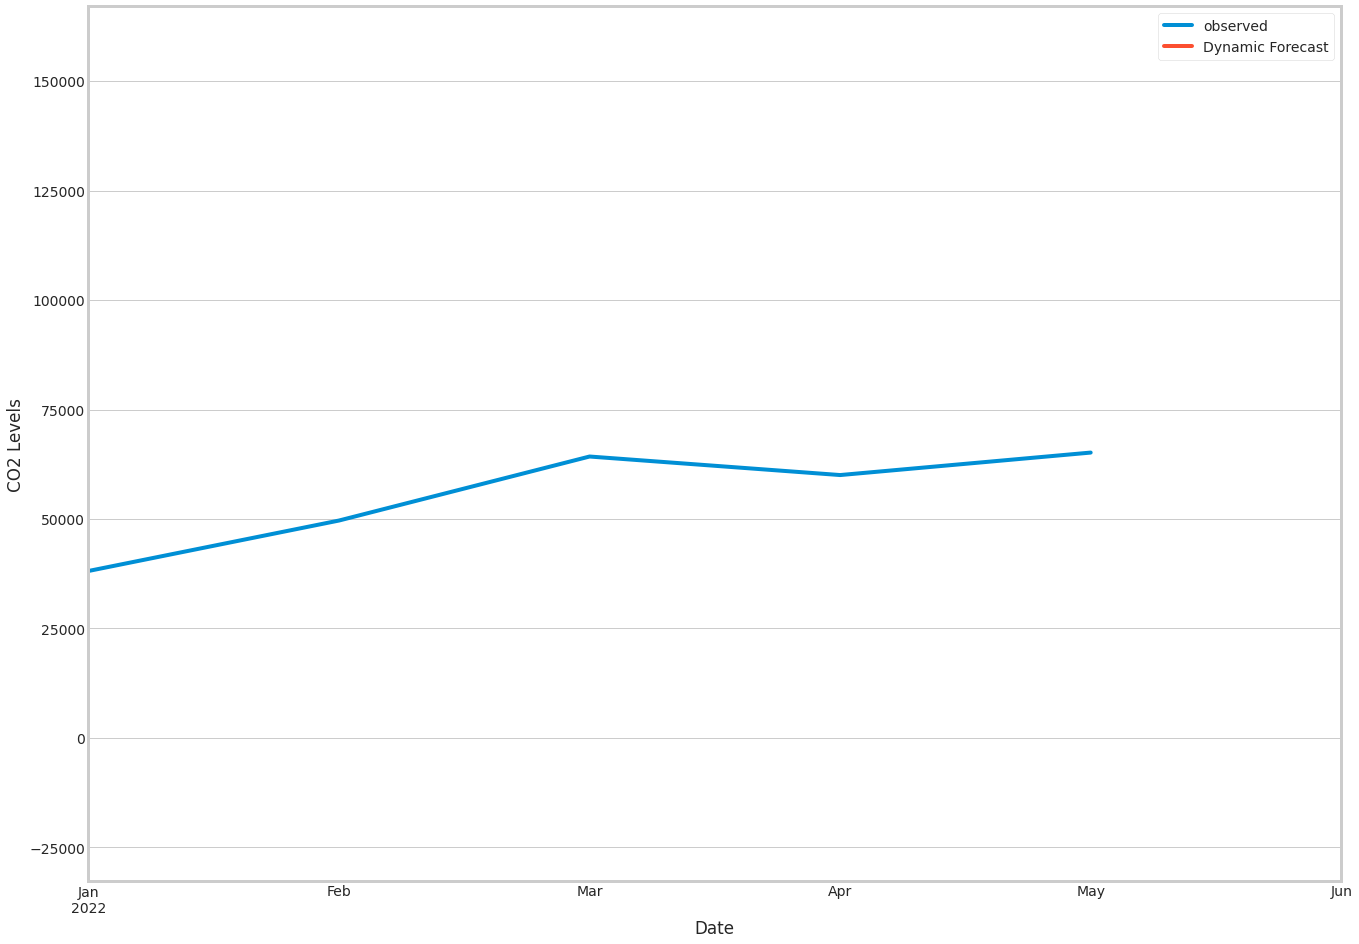

In [50]:
ax = dtf["Otomotiv Satis"]['2022':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2022-05-01'), dtf["Otomotiv Satis"].index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [53]:
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
y_truth = dtf["Otomotiv Satis"]['2021-04-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is nan


In [58]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=13)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [59]:
pred_ci 

,lower Otomotiv Satis,upper Otomotiv Satis
2022-06-01,-15343.758,149731.758
2022-07-01,-73644.016,159808.016
2022-08-01,-88356.590,197562.590
2022-09-01,-95857.515,234293.515
2022-10-01,-119574.037,249546.037
2022-11-01,-132057.391,272293.391
2022-12-01,-188862.307,333152.307
2023-01-01,-260795.010,356861.010
2023-02-01,-290624.049,409732.049
2023-03-01,-312967.399,461305.399


In [56]:
pred_uc

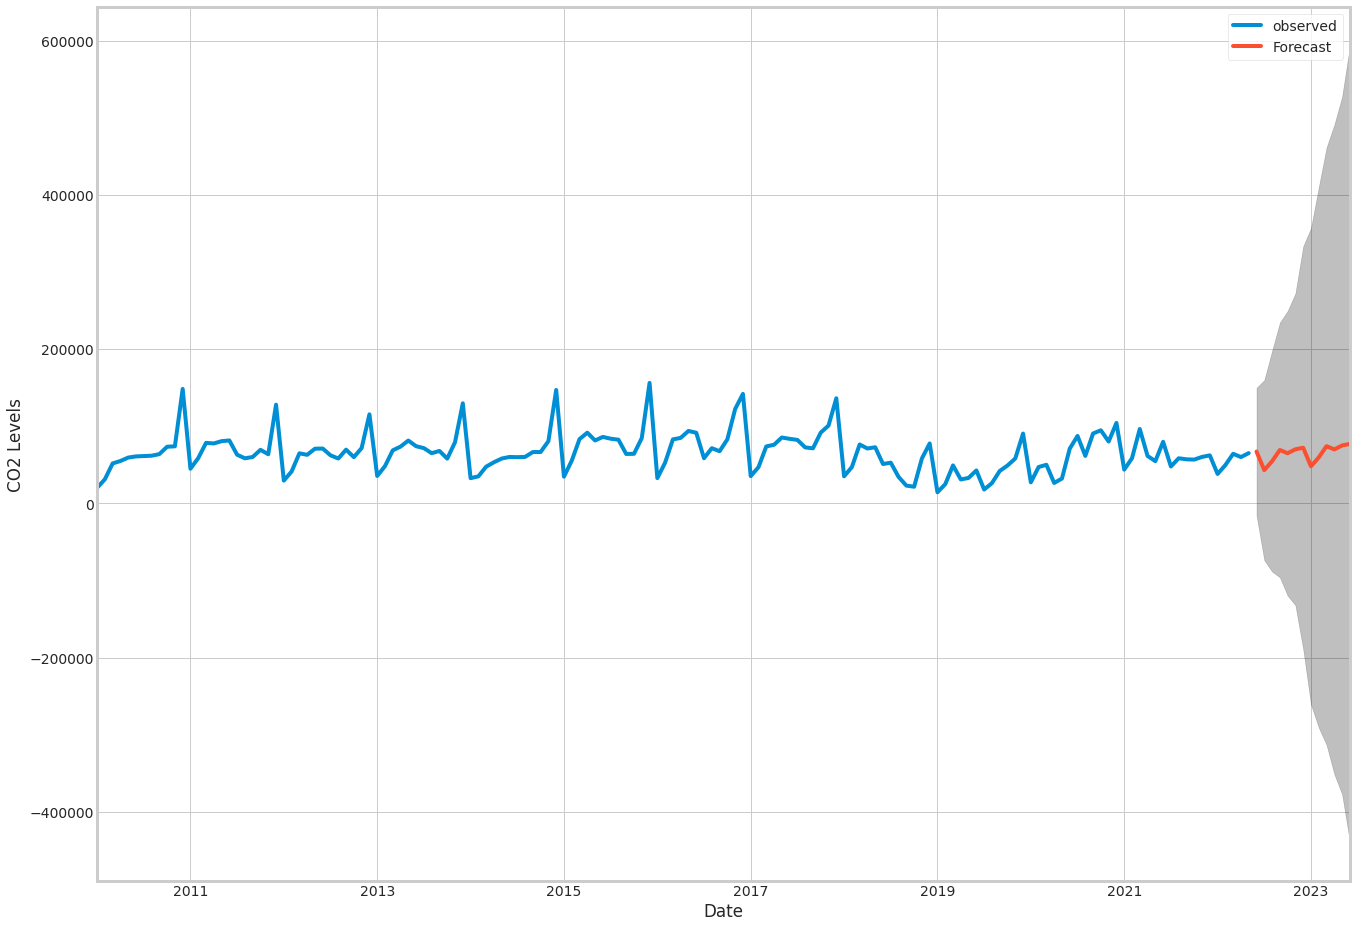

In [60]:
ax = dtf["Otomotiv Satis"].plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('CO2 Levels')

plt.legend()
plt.show()

In [61]:
pred_uc.predicted_mean

2022-06-01   67194.000
2022-07-01   43082.000
2022-08-01   54603.000
2022-09-01   69218.000
2022-10-01   64986.000
2022-11-01   70118.000
2022-12-01   72145.000
2023-01-01   48033.000
2023-02-01   59554.000
2023-03-01   74169.000
2023-04-01   69937.000
2023-05-01   75069.000
2023-06-01   77096.000
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
plt.plot(test["Otomotiv Satis"])
plt.plot(pred,color='red')

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(test["Otomotiv Satis"],pred)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# fit model
model = ARIMA(train["Otomotiv Satis"],order=(9,1,0))
model_fit = model.fit()
# make prediction
pred = model_fit.predict(len(train),len(test)+len(train)-1)
print(pred)

In [ ]:
plt.plot(test["Otomotiv Satis"])
plt.plot(pred,color='red')

In [ ]:
dtf.isnull().sum()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA


history = [x for x in train]
predictions = list()
# walk-forward validation
for i in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	pred = output[0]
	predictions.append(pred)
	true = test[i]
	history.append(true)
	print('predicted=%f, expected=%f' % (pred, true))

# SCalling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
train_scaled = scaler.fit_transform(X_train)
test_scaled = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length = 11
batch_size = 1
generator = TimeseriesGenerator(train_scaled, train_scaled, length = length, batch_size = batch_size)
validation_generator = TimeseriesGenerator(test_scaled, test_scaled, length = length, batch_size = batch_size)

In [ ]:
X, y = generator[0]

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

coklu_regresyon = LinearRegression()
coklu_regresyon.fit(X_train, y_train)
#katsayılar






In [ ]:
print(coklu_regresyon.coef_.round(2))
print(coklu_regresyon.intercept_.round(2))

In [ ]:
y_pred= coklu_regresyon.predict(test_scaled)
print(mean_squared_error(y_test, y_pred, squared=False))
print(r2_score(y_test, y_pred))

In [ ]:
plt.plot(y_test, label='gerçek')
plt.plot(y_pred, label='tahmin')
plt.legend()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
n_features = train_scaled.shape[1]

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights = True)

In [ ]:
model = Sequential()

model.add(LSTM(64, activation = 'relu', return_sequences=True, input_shape = (length, n_features)))
model.add(LSTM(32, activation = 'relu', return_sequences=True))
model.add(LSTM(16, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse')

model.fit_generator(generator,
                    epochs = 20,
                    validation_data = validation_generator,
                    callbacks = [early_stop])

In [ ]:
model.summary()

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:",mse, "\nrmse:",rmse)

In [ ]:
y_train= y_train.to_numpy()



In [ ]:
predictions_scaled = []

first_eval_batch = y_train[-length:]
current_batch = first_eval_batch.reshape(y_train.shape)

for i in range(length):
    
    # get prediction 1 time stamp ahead
    current_pred = model.predict(current_batch)
    
    # store prediction
    predictions_scaled.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:, :], [current_pred], axis=1)

In [ ]:
first_eval_batch = train_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [ ]:
current_batch 

In [ ]:
 current_pred = model.predict(current_batch)

In [ ]:
 current_pred

In [ ]:
dtf_scaled= scaler.transform((dtf.drop("Otomotiv Satis",axis=1)))

In [ ]:
forecast = []

first_eval_batch = dtf_scaled[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(length):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)
    
    # store prediction
    forecast.append(current_pred[0]) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.concatenate(current_batch[:, 1:, :], [current_pred])

In [ ]:
forecast = scaler.inverse_transform(forecast)
forecast

In [ ]:
df

In [ ]:
forecast_index = pd.date_range(start = '2019-10-01', periods = length, freq = 'MS')
forecast_index

In [ ]:
forecast_df = pd.DataFrame(data = forecast, index = forecast_index, columns = ['Forecast'])
forecast_df

In [ ]:
ax = dtf.plot()
forecast_df.plot(ax = ax, figsize = (16, 8));

In [ ]:
ax = dtf.plot()
forecast_df.plot(ax = ax, figsize = (16, 8))
plt.xlim('2018-01-01', '2021-09-01')